In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

**Importando los datos**

In [4]:
df = pd.read_excel('E-Commerce_train.xlsx')
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


In [5]:
df_2 = pd.read_excel('E-Commerce_test.xlsx')
df_2.sort_values('ID',inplace=True)
df_2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


##### Virificar si tenemos datos nulos o vacios

In [6]:
df.info()
# No tenemos datos vacios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


### Cambio los datos tipo objeto a categorico

In [7]:
#La importancia de cambiar de objeto a categorico
df['Warehouse_block'] = df['Warehouse_block'].astype('category')
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].astype('category')
df['Product_importance'] = df['Product_importance'].astype('category')
df['Gender'] = df['Gender'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   8999 non-null   int64   
 1   Warehouse_block      8999 non-null   category
 2   Mode_of_Shipment     8999 non-null   category
 3   Customer_care_calls  8999 non-null   int64   
 4   Customer_rating      8999 non-null   int64   
 5   Cost_of_the_Product  8999 non-null   int64   
 6   Prior_purchases      8999 non-null   int64   
 7   Product_importance   8999 non-null   category
 8   Gender               8999 non-null   category
 9   Discount_offered     8999 non-null   int64   
 10  Weight_in_gms        8999 non-null   int64   
 11  Reached.on.Time_Y.N  8999 non-null   int64   
dtypes: category(4), int64(8)
memory usage: 598.3 KB


### Para la columna "Product_importance" cambiaremos a datos categoricos ordinales a numericos

In [8]:
importancia =  list(df['Product_importance'].unique())
importancia

['low', 'medium', 'high']

In [9]:
from sklearn.preprocessing import OrdinalEncoder

codificador = OrdinalEncoder(categories=[importancia])
codificador.fit(df[['Product_importance']])
df['Product_importance_encoded'] = codificador.transform(df[['Product_importance']])
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_encoded
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1,0.0
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0,1.0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0,1.0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1,1.0
8998,8999,C,Ship,5,4,145,4,low,M,4,4790,0,0.0


#### Correlacion entre variables

In [10]:
df.corr(method='pearson')

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Product_importance_encoded
ID,1.000000,0.214326,-0.000819,0.221421,0.133232,-0.622558,0.361232,-0.457131,-0.050713
Customer_care_calls,0.214326,1.000000,0.012131,0.318109,0.164541,-0.128805,-0.237731,-0.072261,-0.052032
Customer_rating,-0.000819,0.012131,1.000000,0.009818,0.015606,-0.004315,-0.000227,0.011045,0.005401
Cost_of_the_Product,0.221421,0.318109,0.009818,1.000000,0.100637,-0.138259,-0.057113,-0.083470,-0.048838
Prior_purchases,0.133232,0.164541,0.015606,0.100637,1.000000,-0.072634,-0.113060,-0.048269,0.043032
Discount_offered,-0.622558,-0.128805,-0.004315,-0.138259,-0.072634,1.000000,-0.417782,0.416357,0.020371
Weight_in_gms,0.361232,-0.237731,-0.000227,-0.057113,-0.113060,-0.417782,1.000000,-0.326877,0.088788
Reached.on.Time_Y.N,-0.457131,-0.072261,0.011045,-0.083470,-0.048269,0.416357,-0.326877,1.000000,0.014361
Product_importance_encoded,-0.050713,-0.052032,0.005401,-0.048838,0.043032,0.020371,0.088788,0.014361,1.000000


Separamos las variables con mayor correlacion

In [11]:
df_pred = df[['Discount_offered','Weight_in_gms','Reached.on.Time_Y.N',]]
df_pred

,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,44,1233,1
1,59,3088,1
2,48,3374,1
3,10,1177,1
4,46,2484,1
...,...,...,...
8994,1,4177,1
8995,3,4526,0
8996,6,4221,0
8997,5,5931,1


In [12]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [13]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_pred.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,Discount_offered,Weight_in_gms,-0.417782,0.417782
3,Weight_in_gms,Discount_offered,-0.417782,0.417782
2,Discount_offered,Reached.on.Time_Y.N,0.416357,0.416357
6,Reached.on.Time_Y.N,Discount_offered,0.416357,0.416357
5,Weight_in_gms,Reached.on.Time_Y.N,-0.326877,0.326877
7,Reached.on.Time_Y.N,Weight_in_gms,-0.326877,0.326877


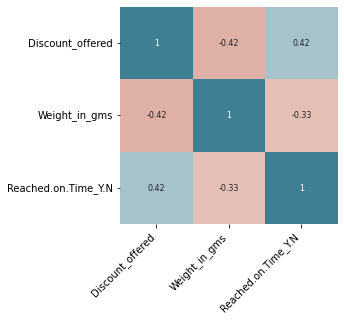

In [14]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Text(0.5, 0.98, 'Distribución variables numéricas')

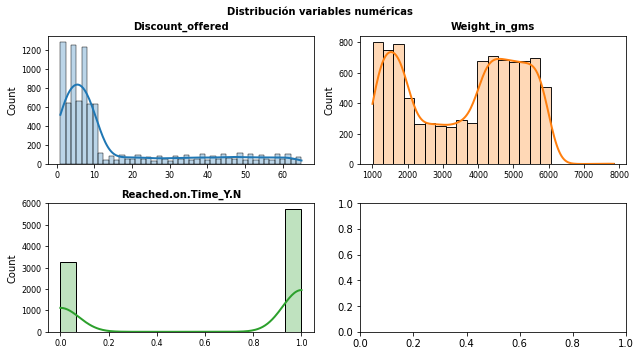

In [15]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_pred.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_pred,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

### Ajustar el modelo

In [16]:
X = df_pred[['Discount_offered','Weight_in_gms']]
y = df_pred['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [17]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     908.6
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:23:13   Log-Likelihood:                -4145.2
No. Observations:                7199   AIC:                             8296.
Df Residuals:                    7196   BIC:                             8317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6950      0.016  

In [18]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,0.663807,0.726193
Discount_offered,0.008732,0.009995
Weight_in_gms,-0.000063,-0.000049


In [19]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

C:\Users\lxcar\AppData\Local\Temp\ipykernel_660248\2178777873.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
c:\Users\lxcar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'Diagnóstico residuos')

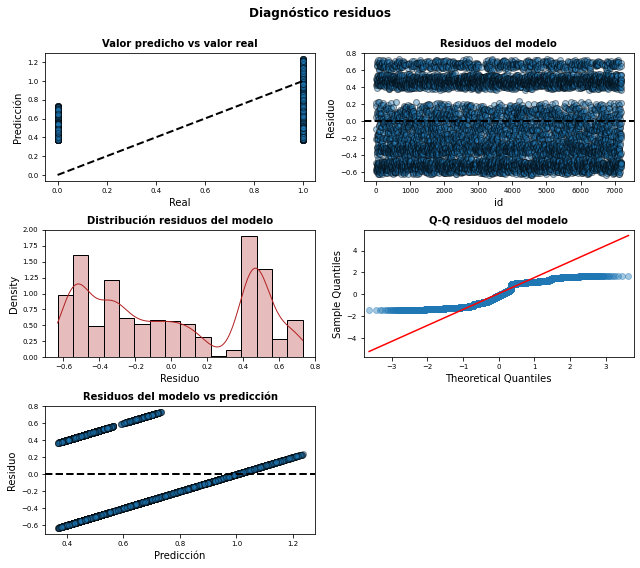

In [20]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

Escalamos nuestros datos para evitar sesgos

In [21]:
from sklearn.preprocessing import MinMaxScaler

datos = MinMaxScaler().fit_transform(df_pred)
datos = pd.DataFrame(datos,columns=['Descuento','Peso','Confirmacion'])
datos

,Descuento,Peso,Confirmacion
0,0.671875,0.033893,1.0
1,0.906250,0.304894,1.0
2,0.734375,0.346676,1.0
3,0.140625,0.025712,1.0
4,0.703125,0.216654,1.0
...,...,...,...
8994,0.000000,0.463988,1.0
8995,0.031250,0.514974,0.0
8996,0.078125,0.470416,0.0
8997,0.062500,0.720234,1.0


### Árboles de decisión 

#### Grafico sobre los datos existentes en la documento train

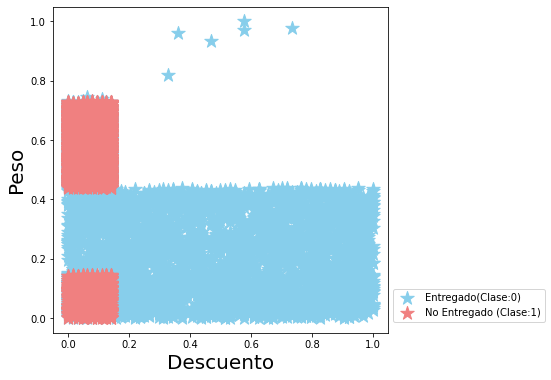

In [22]:
entregado = datos[datos['Confirmacion']== 1]
no_entregado = datos[datos['Confirmacion']== 0]

plt.figure(figsize=(6,6))
plt.xlabel('Descuento',fontsize= 20.0)
plt.ylabel('Peso', fontsize=20.0)
plt.scatter(entregado['Descuento'],entregado['Peso'],
            label='Entregado(Clase:0)', marker='*', c='skyblue', s=200)
plt.scatter(no_entregado['Descuento'], no_entregado['Peso'],
            label='No Entregado (Clase:1)', marker='*', c='lightcoral',s=200)
plt.legend(bbox_to_anchor=(1,0.15))
plt.show()

### Entrenamiento y prueba

In [32]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
                                                            datos[['Descuento','Peso']],
                                                            datos['Confirmacion'],
                                                            test_size = 0.90)


### Arbol de decision

0.7041975308641976
|--- Descuento <= 0.15
|   |--- Peso <= 0.45
|   |   |--- Peso <= 0.14
|   |   |   |--- Peso <= 0.14
|   |   |   |   |--- class: 1.0
|   |   |   |--- Peso >  0.14
|   |   |   |   |--- class: 0.0
|   |   |--- Peso >  0.14
|   |   |   |--- Peso <= 0.44
|   |   |   |   |--- class: 1.0
|   |   |   |--- Peso >  0.44
|   |   |   |   |--- class: 1.0
|   |--- Peso >  0.45
|   |   |--- Peso <= 0.62
|   |   |   |--- Peso <= 0.60
|   |   |   |   |--- class: 0.0
|   |   |   |--- Peso >  0.60
|   |   |   |   |--- class: 0.0
|   |   |--- Peso >  0.62
|   |   |   |--- Peso <= 0.63
|   |   |   |   |--- class: 1.0
|   |   |   |--- Peso >  0.63
|   |   |   |   |--- class: 0.0
|--- Descuento >  0.15
|   |--- class: 1.0



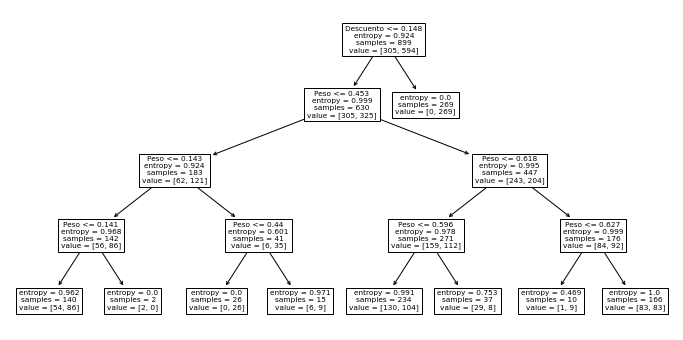

In [35]:
from sklearn import tree 
arbol_decision = tree.DecisionTreeClassifier(criterion='entropy',
                                            max_depth=4)

arbol = arbol_decision.fit(datos_entrena,clase_entrena)

acuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(acuracy)
print(tree.export_text(arbol, feature_names=['Descuento','Peso']))

plt.figure(figsize=(12,6))
tree.plot_tree(arbol,feature_names=['Descuento','Peso'])
plt.show()

### Decision de nuevos registros usando la tabla test

In [50]:
test = df_2[['Discount_offered','Weight_in_gms']]

test = MinMaxScaler().fit_transform(test)
test = pd.DataFrame(test,columns=['Descuento','Peso'])
test_values = test.values.reshape((-1,2))
test_values

array([[1.        , 0.84950971],
       [0.88888889, 0.68901341],
       [0.22222222, 0.94776866],
       ...,
       [0.33333333, 0.03041825],
       [0.11111111, 0.04142485],
       [0.55555556, 0.12727637]])

In [58]:
pred_test = arbol_decision.predict(test_values)
pred_test

c:\Users\lxcar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.])

In [66]:
x1 = pd.DataFrame(pred_test,columns=['pred'])
# EXPORTAR CSV 
x1.to_csv('JaimesCarlos.csv',index=False)